# Proyecto

###  Satisfacción de clientes de líneas aéreas

|Campo|Descripción|
|---|:---|
|id|Número de identificación único para cada pasajero.|
|Gender|Género de los pasajeros (Femenino, Masculino)|
|Customer Type|El tipo de cliente (Cliente fiel, cliente desleal)|
|Age|La edad real de los pasajeros|
|Type of Travel|Motivo del vuelo de los pasajeros (Viaje Personal, Viaje de Negocios)|
|Class|Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)|
|Flight distance|La distancia del vuelo de este viaje|
|Inflight wifi service|Nivel de satisfacción del servicio wifi a bordo (0:No aplicable;1-5)|
|Departure/Arrival time convenient|Nivel de satisfacción de Hora de Salida/Llegada conveniente|    
|Ease of Online booking|Nivel de satisfacción de la reserva online|    
|Gate location|Nivel de satisfacción de la ubicación de la puerta|    
|Food and drink|Nivel de satisfacción de Comida y bebida|    
|Online boarding|Nivel de satisfacción del embarque online|    
|Seat comfort|Nivel de satisfacción de Confort del asiento|    
|Inflight entertainment|Nivel de satisfacción del entretenimiento a bordo|    
|On-board service|Nivel de satisfacción del servicio a bordo|    
|Leg room service|Nivel de satisfacción del servicio de sala de piernas|    
|Baggage handling|Nivel de satisfacción en la gestión de equipajes|    
|Check-in service|Nivel de satisfacción del servicio Check-in|    
|Inflight service|Nivel de satisfacción del servicio a bordo|    
|Cleanliness|Nivel de Satisfacción de Limpieza|    
|Departure Delay in Minutes|Minutos de retraso en la salida|    
|Arrival Delay in Minutes|Minutos de retraso a la Llegada|    
|Satisfaction|Nivel de satisfacción de la aerolínea (Satisfacción, neutral o insatisfacción)|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from mixed_naive_bayes import MixedNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
vuelos = pd.read_csv("vuelos.csv")
vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [3]:
vuelos.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [4]:
vuelos.dropna(axis=0, inplace=True)
vuelos.isnull().sum()
vuelos.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,25893.0,12987.838566,7499.175165,0.0,6496.0,12984.0,19482.0,25975.0
id,25893.0,65021.974858,37606.098635,17.0,32209.0,65344.0,97623.0,129877.0
Age,25893.0,39.621983,15.134224,7.0,27.0,40.0,51.0,85.0
Flight Distance,25893.0,1193.753254,998.626779,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25893.0,2.723709,1.334711,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25893.0,3.046422,1.532971,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25893.0,2.755996,1.412552,0.0,2.0,3.0,4.0,5.0
Gate location,25893.0,2.976442,1.281661,1.0,2.0,3.0,4.0,5.0
Food and drink,25893.0,3.214923,1.331895,0.0,2.0,3.0,4.0,5.0
Online boarding,25893.0,3.261615,1.355505,0.0,2.0,4.0,4.0,5.0


In [5]:
vuelos.drop(labels=["Unnamed: 0"],axis=1,inplace=True)
vuelos.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
def graficosBarras(item):
    x=vuelos[item]
    valorx=x.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(valorx.index,valorx.values)
    plt.xlabel("Calificación")
    plt.ylabel("Frecuencia")
    plt.title(item)
    plt.show()
    print("{}: \n {}".format(x,valorx))

###  Frecuencia de calificaciones de acuerdo a servicios ofrecidos 

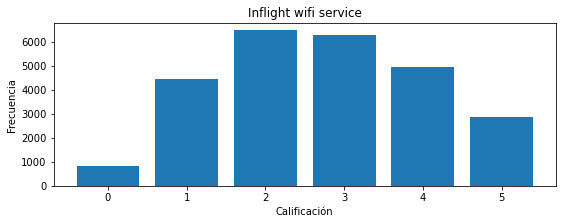

0        5
1        1
2        2
3        0
4        2
        ..
25971    3
25972    4
25973    2
25974    3
25975    2
Name: Inflight wifi service, Length: 25893, dtype: int64: 
 2    6481
3    6298
4    4965
1    4469
5    2868
0     812
Name: Inflight wifi service, dtype: int64


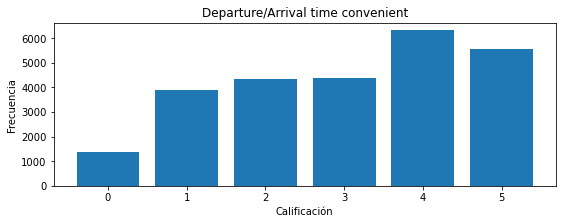

0        4
1        1
2        0
3        0
4        3
        ..
25971    3
25972    4
25973    5
25974    3
25975    5
Name: Departure/Arrival time convenient, Length: 25893, dtype: int64: 
 4    6312
5    5573
3    4399
2    4336
1    3899
0    1374
Name: Departure/Arrival time convenient, dtype: int64


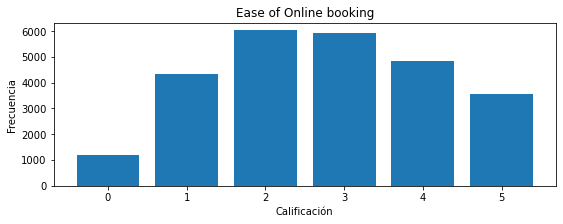

0        3
1        3
2        2
3        0
4        4
        ..
25971    3
25972    4
25973    1
25974    3
25975    2
Name: Ease of Online booking, Length: 25893, dtype: int64: 
 2    6021
3    5927
4    4854
1    4342
5    3556
0    1193
Name: Ease of Online booking, dtype: int64


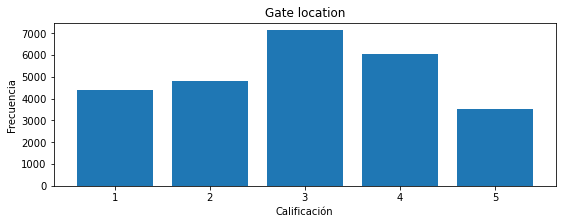

0        4
1        1
2        4
3        2
4        3
        ..
25971    1
25972    4
25973    5
25974    3
25975    5
Name: Gate location, Length: 25893, dtype: int64: 
 3    7122
4    6023
2    4823
1    4415
5    3510
Name: Gate location, dtype: int64


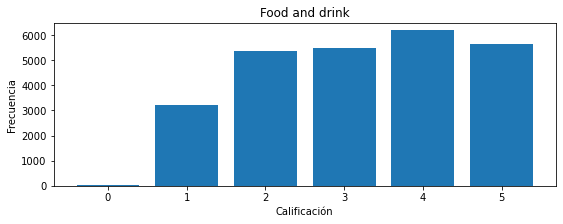

0        3
1        5
2        2
3        3
4        4
        ..
25971    4
25972    4
25973    2
25974    4
25975    4
Name: Food and drink, Length: 25893, dtype: int64: 
 4    6183
5    5626
3    5474
2    5375
1    3210
0      25
Name: Food and drink, dtype: int64


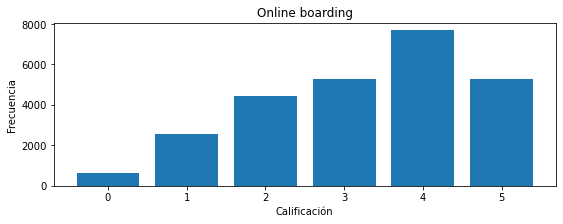

0        4
1        4
2        2
3        4
4        1
        ..
25971    3
25972    4
25973    1
25974    4
25975    2
Name: Online boarding, Length: 25893, dtype: int64: 
 4    7682
3    5296
5    5289
2    4417
1    2558
0     651
Name: Online boarding, dtype: int64


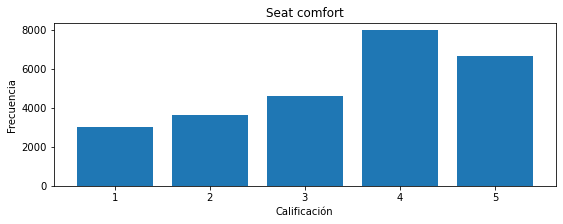

0        3
1        5
2        2
3        4
4        2
        ..
25971    4
25972    4
25973    2
25974    4
25975    2
Name: Seat comfort, Length: 25893, dtype: int64: 
 4    7969
5    6663
3    4617
2    3616
1    3028
Name: Seat comfort, dtype: int64


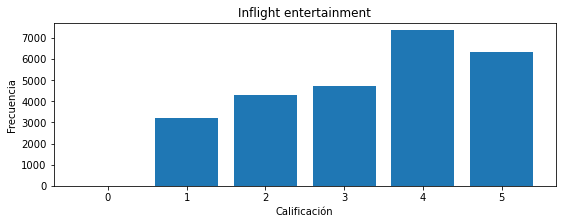

0        5
1        4
2        2
3        1
4        2
        ..
25971    4
25972    4
25973    2
25974    4
25975    1
Name: Inflight entertainment, Length: 25893, dtype: int64: 
 4    7347
5    6306
3    4725
2    4318
1    3193
0       4
Name: Inflight entertainment, dtype: int64


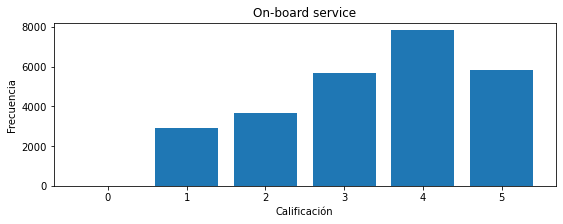

0        5
1        4
2        4
3        1
4        2
        ..
25971    3
25972    4
25973    4
25974    3
25975    1
Name: On-board service, Length: 25893, dtype: int64: 
 4    7814
5    5823
3    5690
2    3658
1    2906
0       2
Name: On-board service, dtype: int64


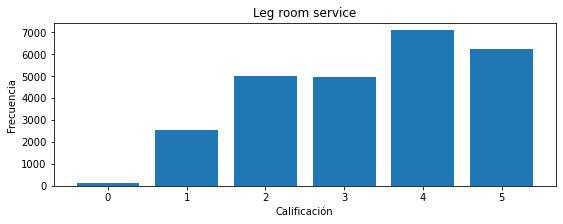

0        5
1        4
2        1
3        1
4        2
        ..
25971    2
25972    5
25973    3
25974    2
25975    2
Name: Leg room service, Length: 25893, dtype: int64: 
 4    7075
5    6216
2    5000
3    4940
1    2536
0     126
Name: Leg room service, dtype: int64


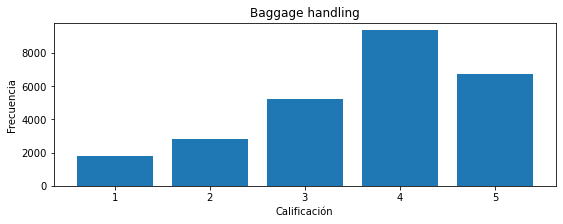

0        5
1        4
2        3
3        1
4        2
        ..
25971    4
25972    5
25973    4
25974    5
25975    1
Name: Baggage handling, Length: 25893, dtype: int64: 
 4    9357
5    6714
3    5204
2    2833
1    1785
Name: Baggage handling, dtype: int64


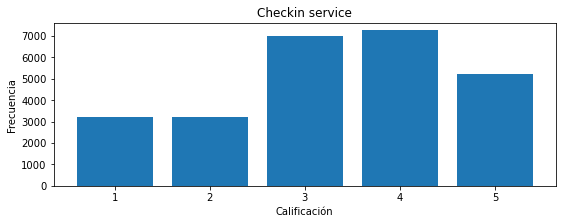

0        2
1        3
2        2
3        3
4        4
        ..
25971    4
25972    5
25973    5
25974    4
25975    1
Name: Checkin service, Length: 25893, dtype: int64: 
 4    7254
3    6987
5    5244
1    3206
2    3202
Name: Checkin service, dtype: int64


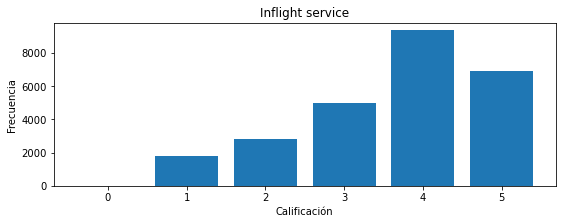

0        5
1        4
2        2
3        1
4        2
        ..
25971    5
25972    5
25973    4
25974    5
25975    1
Name: Inflight service, Length: 25893, dtype: int64: 
 4    9352
5    6921
3    5005
2    2838
1    1775
0       2
Name: Inflight service, dtype: int64


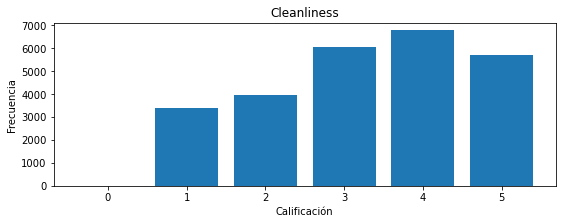

0        5
1        5
2        2
3        4
4        4
        ..
25971    4
25972    4
25973    2
25974    4
25975    1
Name: Cleanliness, Length: 25893, dtype: int64: 
 4    6771
3    6046
5    5702
2    3968
1    3404
0       2
Name: Cleanliness, dtype: int64


In [7]:
variable=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in variable:
    graficosBarras(c)

In [8]:
categoricas=["Gender", "Customer Type", "Type of Travel", "Class","satisfaction"]
for c in categoricas:
    print("{} \n".format(vuelos[c].value_counts()))

Female    13127
Male      12766
Name: Gender, dtype: int64 

Loyal Customer       21111
disloyal Customer     4782
Name: Customer Type, dtype: int64 

Business travel    17980
Personal Travel     7913
Name: Type of Travel, dtype: int64 

Business    12457
Eco         11524
Eco Plus     1912
Name: Class, dtype: int64 

neutral or dissatisfied    14528
satisfied                  11365
Name: satisfaction, dtype: int64 



In [9]:
def histogramas(x):
    plt.figure(figsize=(9,3))
    plt.hist(vuelos[x],bins=50)
    plt.xlabel(x)
    plt.ylabel("Frecuencia")
    plt.title("{} distribución histograma".format(x))
    plt.show()

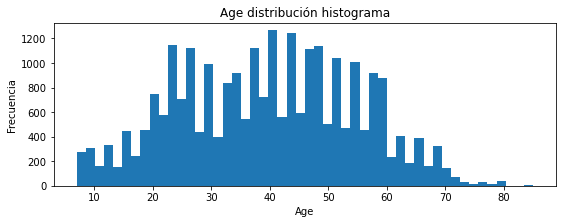

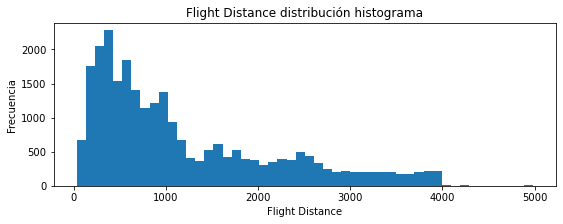

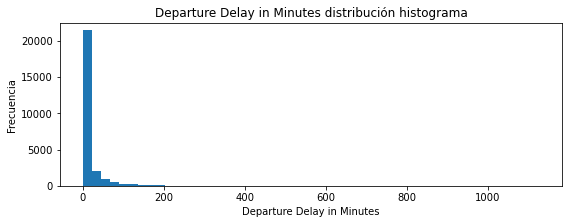

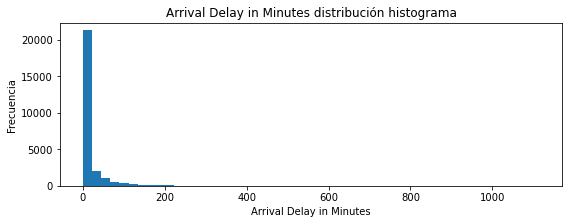

In [10]:
varNumericas=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in varNumericas:
    histogramas(n)

In [11]:
vuelos["satisfaction"]=[1 if each=="satisfied" else 0 for each in vuelos.satisfaction]
vuelos.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,1
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,1


###  Efectos de variables sobre la satisfacción

In [12]:
def efectos(x):
    aux = vuelos[[x,"satisfaction"]].groupby([x],as_index=False).mean().sort_values(by="satisfaction",ascending=False)
    print(aux)

In [13]:
efectos("Gender")


   Gender  satisfaction
1    Male      0.442974
0  Female      0.434981


In [14]:
efectos("Age")

    Age  satisfaction
44   51      0.629482
46   53      0.617834
39   46      0.614286
34   41      0.613312
49   56      0.606195
..  ...           ...
4    11      0.132075
62   69      0.117647
63   70      0.093960
1     8      0.076923
0     7      0.073770

[75 rows x 2 columns]


In [15]:
efectos("Type of Travel")

    Type of Travel  satisfaction
0  Business travel      0.588042
1  Personal Travel      0.100088


In [16]:
efectos("Class")

      Class  satisfaction
0  Business      0.695191
2  Eco Plus      0.247908
1       Eco      0.193596


In [17]:
efectos("Customer Type")

       Customer Type  satisfaction
0     Loyal Customer      0.481313
1  disloyal Customer      0.251777


In [18]:
efectos("Cleanliness")

   Cleanliness  satisfaction
5            5      0.626798
4            4      0.535224
3            3      0.437976
2            2      0.211190
1            1      0.200059
0            0      0.000000


In [19]:
efectos("Inflight wifi service")

   Inflight wifi service  satisfaction
0                      0      0.997537
5                      5      0.987796
4                      4      0.608661
1                      1      0.339226
3                      3      0.256907
2                      2      0.241629


In [20]:
efectos("Inflight entertainment")

   Inflight entertainment  satisfaction
5                       5      0.658896
4                       4      0.609092
3                       3      0.285291
2                       2      0.210051
1                       1      0.150329
0                       0      0.000000


In [21]:
efectos("Food and drink")

   Food and drink  satisfaction
5               5      0.557945
4               4      0.529678
3               3      0.401900
2               2      0.392930
0               0      0.200000
1               1      0.197508


In [22]:
efectos("Seat comfort")

   Seat comfort  satisfaction
4             5      0.655561
3             4      0.557284
1             2      0.233131
2             3      0.224172
0             1      0.223910


###  Detección de valores atípicos

### Mas visualizaciones

### Correlaciones

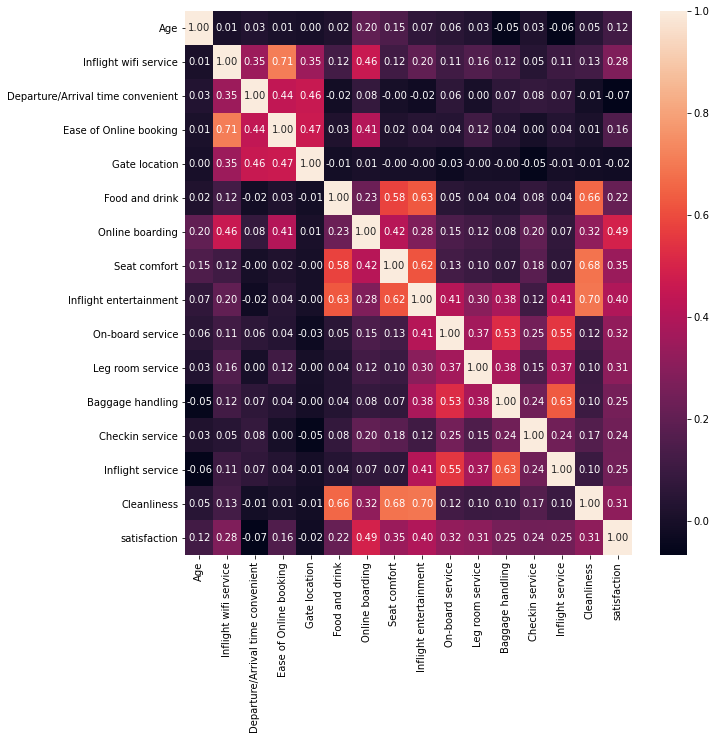

In [23]:
plt.figure(figsize=(10,10))
list1=["Age",'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness',"satisfaction"]
sb.heatmap(vuelos[list1].corr(),annot=True,fmt=".2f")
plt.show()

###  Modelito

In [24]:
tamaño=.25
tamañoTest=round(len(vuelos)*tamaño,0)
print(tamañoTest)

6473.0


In [25]:
codificar = preprocessing.LabelEncoder()

num = vuelos.select_dtypes(include=np.number)
nonum = vuelos.select_dtypes(exclude=np.number)
#nonum = nonum.drop(["satisfaction"], axis=1)
for columna in nonum:
    nonum[columna + "_cod"]=codificar.fit_transform(nonum.loc[:, columna])
    nonum = nonum.drop(columna, axis=1)
nonum.head(3)


,Gender_cod,Customer Type_cod,Type of Travel_cod,Class_cod
0,0,0,0,1
1,0,0,0,0
2,1,1,0,1


In [26]:
X = pd.concat([num,nonum], axis=1)
y = vuelos.loc[:,vuelos.columns=="satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamaño, random_state=0, stratify=y)
y_expect = y_test

### Bernoulli Naive Bayes

In [27]:
BernNB = BernoulliNB(binarize = 0.1)
BernNB.fit(X_train, y_train)
y_pred = BernNB.predict(X_test)
B = accuracy_score(y_expect, y_pred)
Bn = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)
print(B,Bn)

1.0 -1.0


### Multinomial Naive Bayes

In [38]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
y_pred = MultiNB.predict(X_test)
M = accuracy_score(y_expect, y_pred)
Mn = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)
print(M,Mn)

0.606425702811245 2547.0


### Gaussian Naive Bayes

In [29]:
GaussNB=GaussianNB()
GaussNB.fit(X_train, y_train)
y_pred = GaussNB.predict(X_test)
G = accuracy_score(y_expect, y_pred)
Gn = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)
print(G,Gn)

0.8388940376892184 1042.0


###  Mixed Naive Bayes

In [43]:
yCod = codificar.fit_transform(vuelos.loc[:, "satisfaction"])
X_train, X_test, y_train, y_test = train_test_split(X, yCod, test_size=tamaño, random_state=0, stratify=yCod)
y_expect = y_test

In [44]:
MixtoNB = MixedNB(categorical_features=[20,21,22,23])
MixtoNB.fit(X_train,y_train)
y_pred = MixtoNB.predict(X_test)
Mix =accuracy_score(y_test, y_pred)
MixG = tamañoTest - accuracy_score(y_expect, y_pred, normalize=False)

In [45]:
print(Mix,MixG)

0.8611368551127587 898.0


###  Resumen


In [47]:
cabeceras= ["MultinomialNB","GaussianNB","MixedNB"]
valores= [[M,Mn],[G,Gn],[Mix,MixG]]
tabla = pd.DataFrame(data=valores, index=cabeceras, columns = ["% Aciertos", "No Achuntes"])
print("Con una proporción de muestra de: ", tamaño*100, "%")
tabla.sort_values(by="% Aciertos", ascending= False)


Con una proporción de muestra de:  25.0 %


,% Aciertos,No Achuntes
MixedNB,0.861137,898.0
GaussianNB,0.838894,1042.0
MultinomialNB,0.606426,2547.0
